# Prep Notebook 6
## The Simpsons and Bicycles II

This notebook has a few exercises that can serve as a primer for what to expect in the `Problem Session 6` notebook. These exercises will touch upon the basic python, `pandas`, `numpy`, `matplotlib` and some supervised learning basic techniques that you may want a refresher on prior to starting `Problem Session 6`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

set_style("whitegrid")

##### 1. Time series cross-validation

Import the cross-validation object from `sklearn` that you would use to perform cross-validation on a time series.

##### Sample Solution

In [2]:
from sklearn.model_selection import TimeSeriesSplit

##### 2. MSE

Import the `sklearn` metric function that you can use to calculate the mean squared error.

##### Sample Solution

In [3]:
from sklearn.metrics import mean_squared_error

##### 3. Loading data

Load the following data and make the following train test split

In [4]:
pumpkin = pd.read_csv("../../Data/goog_trend_pumpkin.csv")

In [5]:
pumpkin_test = pumpkin.tail(12).copy()
pumpkin_train = pumpkin.drop(pumpkin_test.index).copy()

##### 4. Recording MSE over cross-validation

Fill in the missing code chunks below to create an array of zeros that will be replaced with the MSE each time through the cross-validation.

##### Sample Solution

In [6]:
## Make the cross-validation object here
## 5 splits and a test_size of 12
cv = TimeSeriesSplit(5, test_size=12)

## Make the zero array here 
mses = np.zeros(5)


i = 0
for train_index, test_index in cv.split(pumpkin_train):
    pumpkin_tt = pumpkin_train.iloc[train_index]
    pumpkin_ho = pumpkin_train.iloc[test_index]
    
    pred = pumpkin_tt.pumpkin_trend.mean() * np.ones(len(pumpkin_ho))
    
    ## record the mse between the prediction and the 
    ## actual holdout pumpkin_trend here
    mses[i] = mean_squared_error(pumpkin_ho.pumpkin_trend.values, pred)
    
    ## increase the split counter
    i = i + 1

##### 5. `np.mean` I

Use `np.mean` to find the arithmetic mean of `mses` from problem 4.

##### Sample Solution

In [7]:
np.mean(mses)

650.1783501545202

##### 6. `np.mean` II

Find the column mean of `X` below using `np.mean`, <a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html">https://numpy.org/doc/stable/reference/generated/numpy.mean.html</a>.

##### Sample Solution

In [8]:
np.random.seed(440)
X = np.random.randn(10,4)

In [9]:
np.mean(X, axis=0)

array([-0.53177164,  0.08421444, -0.64758285,  0.22759647])

##### 7. Yes another plot

Make a scatter plot of `y` against `X` after generating the data below. Then plot `line_y` against `line_x` on top of the scatter plot. Label the horizontal axis, "X", the vertical axis "y" and add a legend to the plot.

In [10]:
np.random.seed(403)

X = 2*np.random.random(size=100)-1
y = 3 + 2*X + np.random.randn(100)

line_x = np.linspace(-1,1,100)
line_y = 3 + 2*line_x

##### Sample Solution

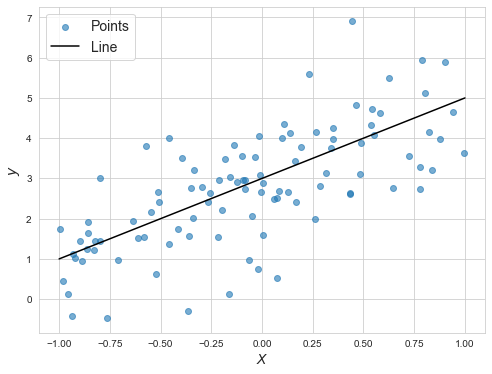

In [11]:
plt.figure(figsize=(8,6))

plt.scatter(X, y, label="Points", alpha=.6)
plt.plot(line_x, line_y, 'k', label="Line")

plt.xlabel("$X$", fontsize=14)
plt.ylabel("$y$", fontsize=14)

plt.legend(fontsize=14)

plt.show()

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)